# A pendulum with a slipping suspension point  

A pendulum with a slipping point of suspension

Consider a pendulum for which the suspension point can move horizontally freely.

In [1]:
load('cas_utils.sage')

In [2]:
var('t')
var('l g m1 m2')

xy_wsp = [('x1','x_1'),('y1','y_1'),('x2','x_2'),('y2','y_2')]

uv_wsp = [('phi','\phi'),('x','x')]

to_fun, to_var = make_symbols(xy_wsp, uv_wsp)

phi  :: has been  processed
x  :: has been  processed
x1  :: has been  processed
y1  :: has been  processed
x2  :: has been  processed
y2  :: has been  processed


## Equations of motion in a Cartesian system
Let us derive the equations of motion in the Cartesian system. Let's start with the d'Alembert rule:

In [4]:
dAlemb = (m1*x1.subs(to_fun).diff(t,2))*dx1 + \
         (m1*y1.subs(to_fun).diff(t,2)+m1*g)*dy1+\
         (m2*x2.subs(to_fun).diff(t,2))*dx2 + \
         (m2*y2.subs(to_fun).diff(t,2)+m2*g)*dy2
dAlemb = dAlemb.subs(to_var)
showmath(dAlemb)

<IPython.core.display.Math object>

Equations of constraints for the system are:

 - $y_1=0$
 - $(x_1-x_2)^2+(y_1-y_2)^2=l^2$

We calculate the variation of constraint equations (ie we present constraints in a differential form) using the formulas:
$$\delta f  = \frac{\partial f}{\partial x_1}\delta x_1 +\frac{\partial f}{\partial x_2}\delta x_2 + \frac{\partial f}{\partial y_1}\delta y_1 +\frac{\partial f}{\partial y_2}\delta y_2$$
This difference is analogous to a general differential with the difference that time is treated as a constant.

In [5]:
f = (x1-x2)^2+(y1-y2)^2-l^2
df = f.diff(x1)*dx1 + f.diff(x2)*dx2 + f.diff(y1)*dy1 + f.diff(y2)*dy2
showmath(df)

<IPython.core.display.Math object>

In [5]:
# wzor na df mozna zautomatyzowac w nastepujacy sposob
# df = sum([f.diff(w)*vars()['d'+repr(w)] for w in xy])

We substitute  $\delta y_1 = 0$ and $y_1 = 0$ and then calculate $\delta y_2$ as a function of $\delta x_1$ and $\delta x_2$:

In [6]:
dy2_wiezy = df.subs({dy1:0,y1:0}).solve(dy2)[0].rhs()
showmath( dy2_wiezy )

<IPython.core.display.Math object>

By substituting the term d'Alembert for the $\delta y_2$ expression as a function of the other shifts and $\delta y_1=0$, we get:

In [7]:
showmath(  dAlemb.subs({dy2:dy2_wiezy,dy1:0}) )

<IPython.core.display.Math object>

Możemy teraz pomnożyć tak otrzymaną zasadę d'Alemberta przez $y_2$ oraz wyciągnąć przed nawias współczynniki przy niezależnych przesunięciach $\delta x_1$ oraz $\delta x_2$.

We can now multiply the so-obtained d'Alembert rule by $y_2$ and take parentheses with independent $\delta x_1$ and $\delta x_2$ offsets.

In [8]:
showmath(  (dAlemb.subs({dy2:dy2_wiezy,dy1:0})*y2).expand().collect(dx1).collect(dx2) )

<IPython.core.display.Math object>

Because the $\delta x_1$ and $\delta x_2$ virtual offsets are completely arbitrary (we have already used the dependency using constraints equations), both coefficients next to them must disappear so that the entire expression will be zeroed identically. In this way, we get two differential equations, which together with equations of constants describe the dynamics of our system:

In [12]:
r1 = (dAlemb.subs({dy2:dy2_wiezy,dy1:0})*y2).expand().coefficient(dx1) 
r2 = (dAlemb.subs({dy2:dy2_wiezy,dy1:0})*y2).expand().coefficient(dx2)
showmath( r1 )


<IPython.core.display.Math object>

In [13]:
showmath( r2 )

<IPython.core.display.Math object>

In order to be able to apply a numerical procedure to the above equations, the equation resulting from the differentiation of constraints comes:

In [14]:
r3 = f.subs({y1:0}).subs(to_fun).diff(t,2).subs(to_var)
showmath( r3 )

<IPython.core.display.Math object>

The above three equations can be solved on $\ddot x_1$, $\ddot x_2$, $\ddot y_1$ and explicitly write a system of second degree equations that is directly applicable to numerical resolution:

In [18]:
sol =  solve([r1,r2,r3],[x1dd,x2dd,y2dd])[0]

In [21]:
showmath(sol[0])

<IPython.core.display.Math object>

In [22]:
showmath(sol[1])

<IPython.core.display.Math object>

In [23]:
showmath(sol[2])

<IPython.core.display.Math object>

### Equations of motion in a system consistent with constraints
A much better idea is to solve the above problem in coordinates consistent with constraints. In this case, we will not have to additionally create a differential equation from the equation of constraints, the number of equations will be equal to the number of degrees of freedom (including cases 2). In addition, any solution to the system of differential equations will be

In [24]:
x2u = {x1:x,x2:x+l*sin(phi),y2:-l*cos(phi),y1:0} 
showmath(x2u)

<IPython.core.display.Math object>

To go to the description of the system in such parameterization:

 - save $\ddot x_i - F_i$ expressions in new variables.
 - save $\delta x_1,\delta y_1,\delta y_2,\delta y_2$ virtual shifts as shifting functions in new $\delta x,\delta\phi$ variables using the formulas:



$$ \delta x_1 = \frac{\partial x_1}{\partial x}\delta x + \frac{\partial x_1}{\partial \phi}\delta \phi$$

In order to execute the second point, let's define the 'dx1_polar' variables in Sage ... which are the expression of virtual offsets in the new parameterization:

In [25]:
transform_virtual_displacements(xy_wsp, uv_wsp, verbose=True)

dx1_polar : is added to namespace


[dx1, dx]

dy1_polar : is added to namespace


[dy1, 0]

dx2_polar : is added to namespace


[dx2, dphi*l*cos(phi) + dx]

dy2_polar : is added to namespace


[dy2, dphi*l*sin(phi)]

[dx, 0, dphi*l*cos(phi) + dx, dphi*l*sin(phi)]

The first point requires the transformation of the second Cartesian coordinate derivatives to the new parameterization. We can do this for every variable, let's take $x_1$ for example:

 - we change coordinates to new ones
 - we change algebraic variables into time functions
 - we count the derivative over time
 - we are going back to algebraic variables

In [26]:
showmath( x2.subs(x2u).subs(to_fun).diff(t,2).subs(to_var) )

<IPython.core.display.Math object>

Using this technique, we can rewrite the d'Alembert principle for our problem:

In [27]:
dAlemb = (m1*x1.subs(x2u).subs(to_fun).diff(t,2)  )*dx1_polar + \
         (m1*y1.subs(x2u).subs(to_fun).diff(t,2)+m1*g)*dy1_polar + \
         (m2*x2.subs(x2u).subs(to_fun).diff(t,2)  )*dx2_polar + \
         (m2*y2.subs(x2u).subs(to_fun).diff(t,2)+m2*g)*dy2_polar
dAlemb = dAlemb.subs(to_var)

It looks like this:

In [28]:
showmath(dAlemb)

<IPython.core.display.Math object>

As in the previous case, the coefficients at $\delta x$ and $\delta \phi$ must be zeroed, which implies giving us two conditions that are the equations of motion:

In [29]:
r1 = dAlemb.expand().coefficient(dx).trig_simplify()
r2 = dAlemb.expand().coefficient(dphi).trig_simplify()
showmath(r1)

<IPython.core.display.Math object>

In [30]:
showmath(r2)

<IPython.core.display.Math object>

Because each of these equations contains a second derivative of both variables, treating the above equations as a system of equations (linear) on $\ddot{ x}$ and $\ddot{ \phi}$ we solve it:

In [36]:
sol = solve([r1,r2],[xdd,phidd])[0]
showmath(sol[0])

<IPython.core.display.Math object>

In [37]:
showmath(sol[1])

<IPython.core.display.Math object>

For further analysis, we can assign equations to the variables s1 and s2:

In [38]:
s1,s2 = solve([r1,r2],[xdd,phidd])[0]

In [39]:
showmath( expand( s1.rhs().denominator()/m2 ) )

<IPython.core.display.Math object>

In [43]:
sol = solve([r1,r2],[xdd,phidd])[0]

In [44]:
showmath(sol[0])

<IPython.core.display.Math object>

In [45]:
showmath(sol[1])

<IPython.core.display.Math object>

### Case study $m_1 >> m_2$
One would expect that if the first mass is much larger than the other, the system of equations will strive for a mathematical pendulum. To do this, let's divide by $m_1$:


In [47]:
showmath( ((s1.rhs().numerator()/m1).expand() )/( (s1.rhs().denominator()/m1).expand() ) )

<IPython.core.display.Math object>

In [48]:
showmath( ((s2.rhs().numerator()/m1).expand() )/( (s2.rhs().denominator()/m1).expand() ) )

<IPython.core.display.Math object>

You can see that the first expression tends to zero and the second to
$$\frac{g \sin\left(\phi\right)}{l}$$

We can also use the function limit, which directly leads to the result:

In [50]:
limit(s1.rhs(),m1=oo)

0

In [51]:
showmath( limit(s2.rhs(),m1=oo) ) 

<IPython.core.display.Math object>

### Case study $m_2 >> m_1$

In this case, the first mass is negligible.

In [52]:
showmath( limit(s1.rhs(),m2=oo) )

<IPython.core.display.Math object>

In [53]:
showmath( limit(s2.rhs(),m2=oo) )

<IPython.core.display.Math object>

In [54]:
showmath([s1.rhs().taylor(phi,0,1),s2.rhs().taylor(phi,0,1)])

<IPython.core.display.Math object>

### Numerical analysis of the system
The initial condition is four $x,\phi,\dot x,\dot \phi$ numbers. Consider, however, a subset of those conditions for which the total momentum of the system is zero.
Note that the case of a system that has a non-zero total momentum can be reduced to a zero moment event by transformation to the center of mass system.
So we have:
$$ m_1 \dot x_1 + m_2 \dot x_2 = 0$$
or
$$ m_1 \dot x + m_2 \dot x + m_2 l \dot \phi\cos(\phi) = 0$$
for the case of $m_1=m_2$ and starting from the lowest position of the second mass ($\phi=0$) we will have:
$$ 2 \dot x = - l \dot \phi = 0.$$
So for this case, we have a one-parameter family of solutions in which the speed $\dot \phi = \omega_0$ is independent:
$$x =0 ,\phi=0,\dot x=-\frac{2}{l}\omega_0,\omega_0$$



In [55]:
showmath( solve(m1*x+m2*x+m2*l*phid*cos(phi),x)[0].rhs() )

<IPython.core.display.Math object>

In [57]:
pars = {l:1,g:9.81,m1:2.1,m2:130}
ode=[xd,phid,s1.rhs().subs(pars),s2.rhs().subs(pars)]
times=srange(0,2.25,0.015)
ics=[0,0,-(1/2),14.]
#ics=[0,pi/2,0,3]
w0 = 6.2
ics = [0,0,(-l*m2*w0/(m1+m2)).subs(pars),w0]
sol = desolve_odeint(ode,ics,times,[x,phi,xd,phid])

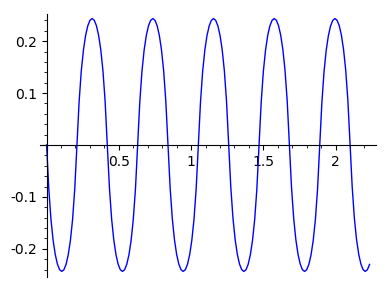

In [58]:
line( zip(times,sol[:,0]),figsize=4 )

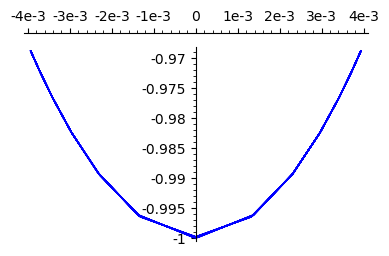

In [59]:
import numpy as np 
line( zip(np.sin(sol[:,1])+sol[:,0],-np.cos(sol[:,1])),figsize=4 )+\
 line( zip(np.sin(sol[:,1])+sol[:,0],-np.cos(sol[:,1])),figsize=4 )

In [60]:
def draw_system(ith=0,l=1):
    x,phi = sol[ith,:2]
    x1,y1,x2,y2 =x, 0,  l*sin(phi) + x,-l*cos(phi)
    
    p = point( (x1,y1), size=40) +\
     point( (x2,y2), size=40,color='red',figsize=3) +\
     line( [(x1,y1),(x2,y2)],aspect_ratio=1)
    n=20
    i0 = max(0,ith-n)
    trace = sum([point((l*sin(phi) + x,-l*cos(phi)),hue=(0,(i)/n,1)) for i,(x,phi) in enumerate(sol[i0:ith,:2])])
    trace2 = sum([point((x,0),hue=(.51,(i)/n,1)) for i,(x,phi) in enumerate(sol[i0:ith,:2])])
    #print i0,ith,[(i)/n. for i,(x,phi) in enumerate(sol[i0:ith,:2])]
    p += trace+trace2
    
    p.set_axes_range(-1.2,1.2,-1.2,1.2)
    p.set_aspect_ratio(1)
    return p

In [66]:
sol.shape

(150, 4)

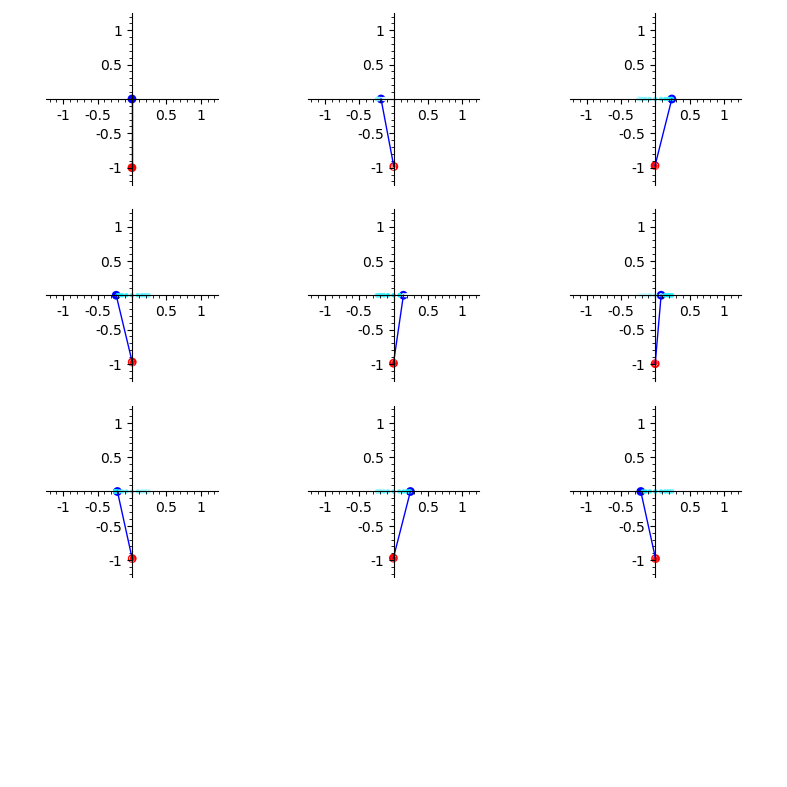

In [79]:
graphics_array([draw_system(i*11) for i in range(9)],ncols=3).show(figsize=8)

    %%time
    N = sol.shape[0]
    every = int(N/25)
    anim = animate([draw_system(i) for i in range(0,N,every)])
    anim.show()

    @interact
    def _(ith=slider(range(N))):
        plt = draw_system(ith=ith,l=1)
        plt.show(figsize=6)

###  Problems

 - Compare the layout solution in a general form to solutions of special cases:
 - $m_1>>m_2$
 - How does the period of movement depend on total energy? Compare the result with the mathematical pendulum.

\newpage